### 3.

x1: Uniform distribution
x2:
\begin{equation}  
f_{\chi_{2}}(x_2) =  
\begin{cases}  
\frac{n(n-1)}{4m} \ln\left(\frac{n}{n-2}\right), & 0 \leq x \leq \frac{2m(n-2)}{n(n-1)} \\
\frac{n(n-1)}{4m} \ln\left(\frac{2m}{(n-1)x_2}\right), & \frac{2m(n-2)}{n(n-1)} < x_2 \leq \frac{2m}{n-1}  
\end{cases}  
\end{equation}  

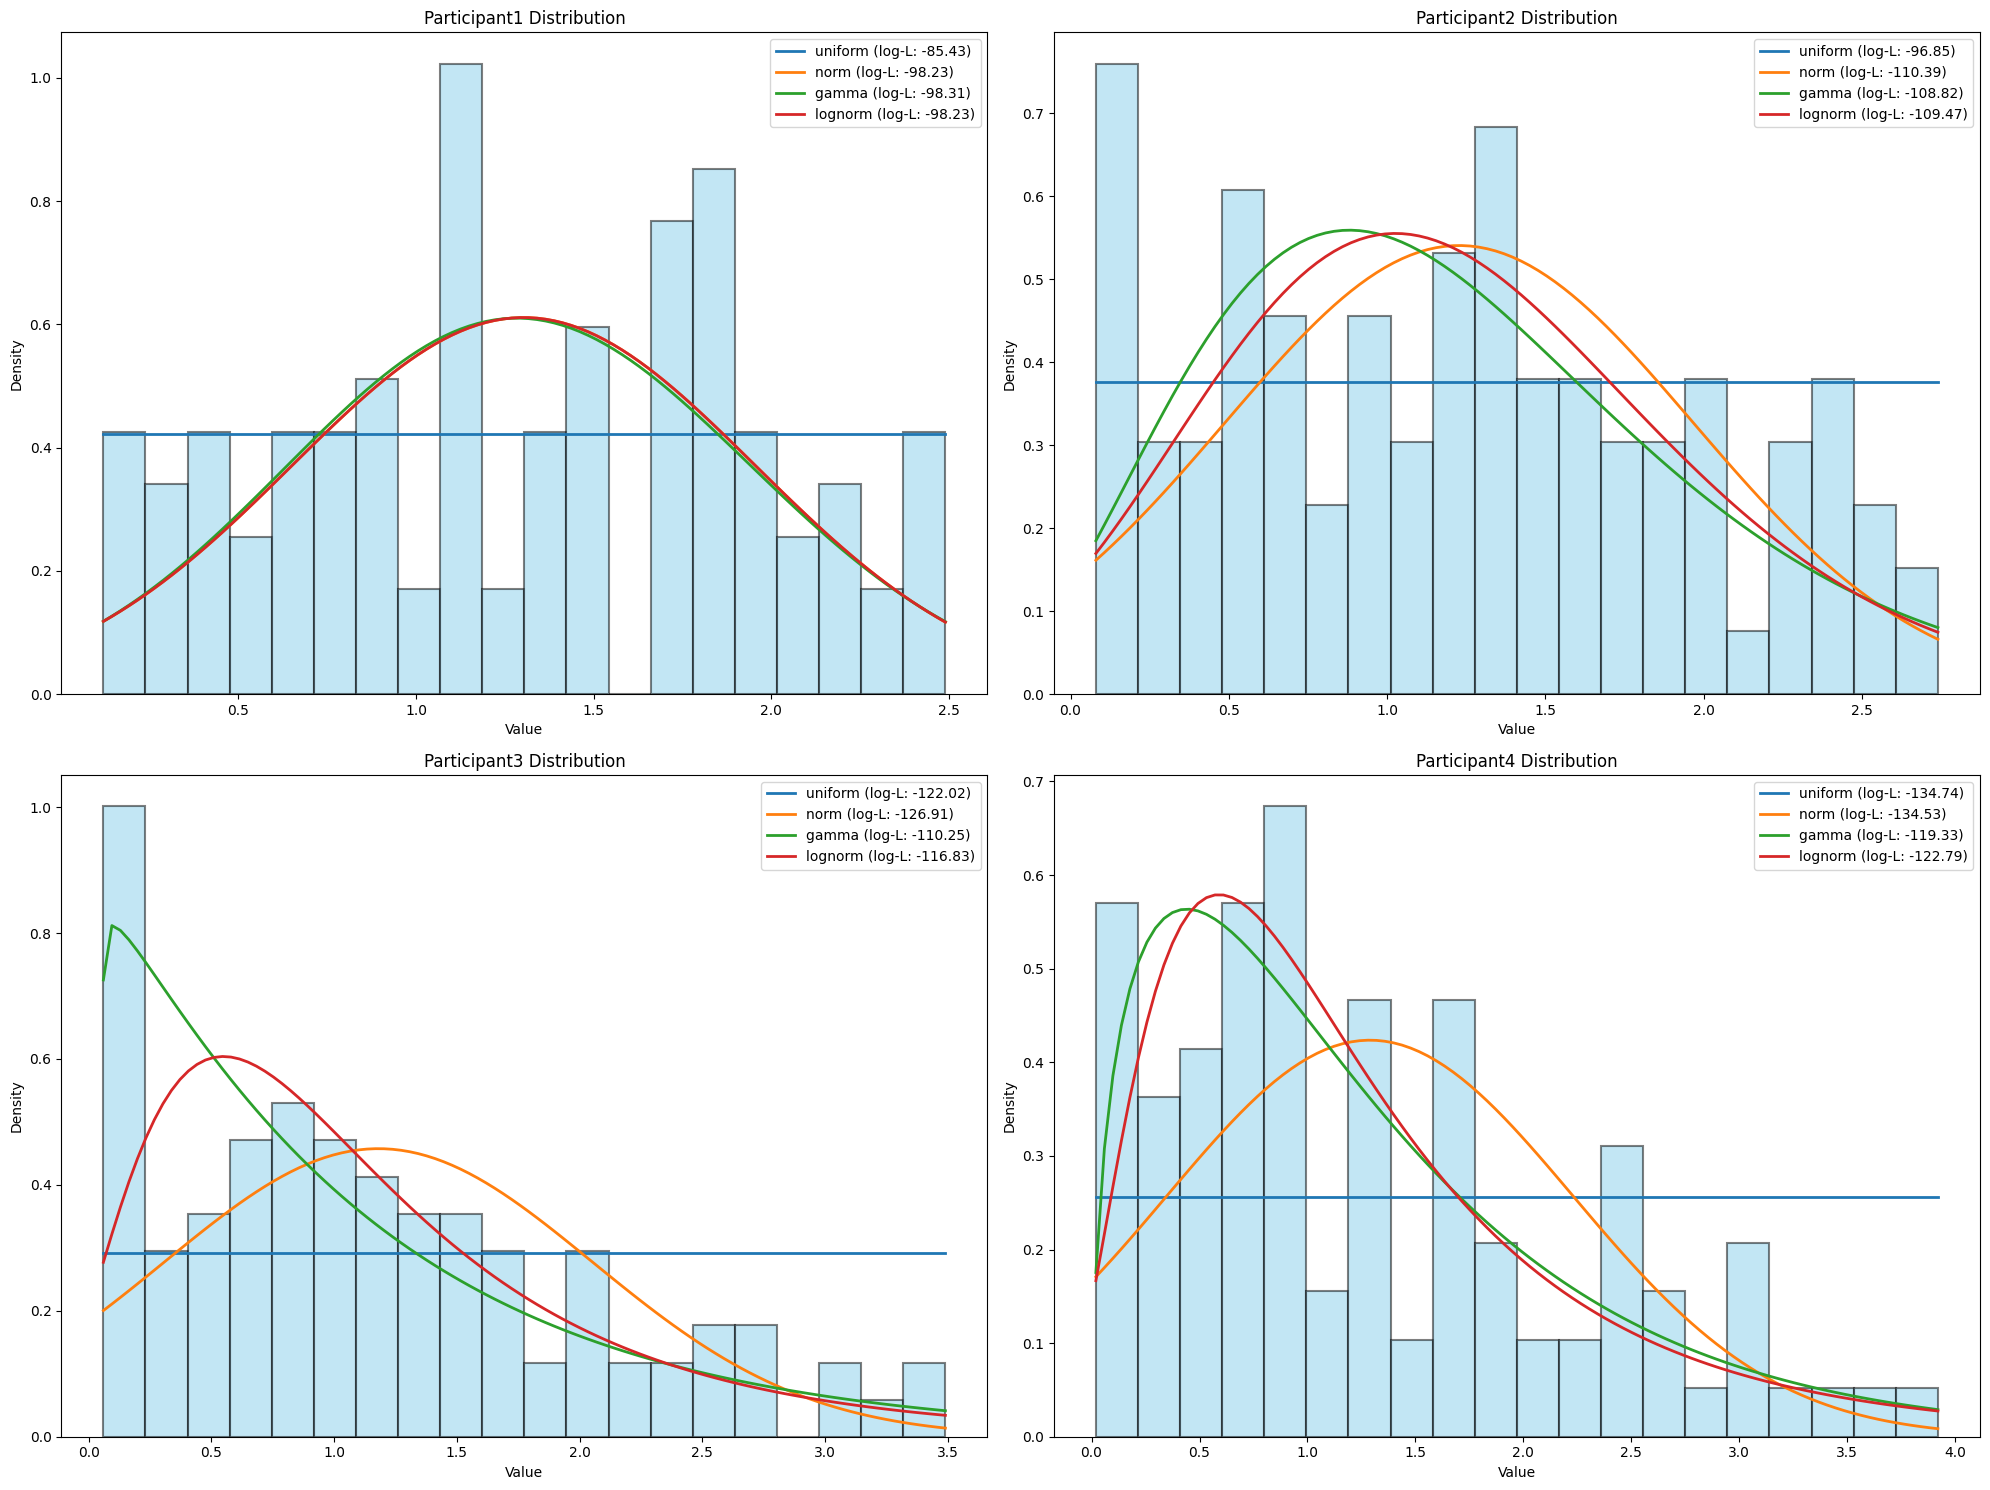


Participant1 distribution fitting results:
Distribution: uniform
Parameters: (np.float64(0.12), np.float64(2.37))
Log-likelihood: -85.42610555955694

Distribution: norm
Parameters: (np.float64(1.303030303030303), np.float64(0.6526642438829804))
Log-likelihood: -98.23236157426494

Distribution: lognorm
Parameters: (np.float64(1.991702713122946e-05), -32767.87999999997, np.float64(32769.18302380342))
Log-likelihood: -98.23243187675307

Distribution: gamma
Parameters: (np.float64(1207.9777089585227), np.float64(-21.42600570992815), np.float64(0.018815215098743607))
Log-likelihood: -98.30651112133785


Participant2 distribution fitting results:
Distribution: uniform
Parameters: (np.float64(0.08), np.float64(2.66))
Log-likelihood: -96.85428615656713

Distribution: gamma
Parameters: (np.float64(5.046337941379537), np.float64(-0.5252401149765062), np.float64(0.34750975145734364))
Log-likelihood: -108.81850258200569

Distribution: lognorm
Parameters: (np.float64(0.18554248695196), -2.78069838

In [30]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import stats  

# Read data  
df = pd.read_csv('data2.csv')  
df.columns = ['Participant1', 'Participant2', 'Participant3', 'Participant4']  

# Define the distributions to test  
distributions = [  
    stats.uniform,   # Uniform distribution  
    stats.norm,      # Normal distribution  
    stats.gamma,     # Gamma distribution  
    stats.lognorm,   # Log-normal distribution  
]  

# Create figure  
plt.figure(figsize=(20, 15))  

# Store the distribution fitting results for each participant  
all_results = {}  

# Analyze for each participant  
for i, participant in enumerate(['Participant1', 'Participant2', 'Participant3', 'Participant4'], 1):  
    data = df[participant]  
    
    # Create a subplot  
    plt.subplot(2, 2, i)  
    
    # Plot the histogram without overlap  
    plt.hist(data, bins=20, density=True, alpha=0.5, color='skyblue', edgecolor='black', linewidth=1.5)  # Set alpha to 0.5 for transparency  
    plt.title(f'{participant} Distribution')  
    plt.xlabel('Value')  
    plt.ylabel('Density')  
    
    # Store current participant's distribution fitting results  
    participant_results = []  
    
    # Fit each distribution  
    for dist in distributions:  
        try:  
            # Maximum likelihood estimation parameters  
            if dist == stats.uniform:  
                # For uniform distribution, use the min and max of the data  
                params = (data.min(), data.max() - data.min())  
                # Calculate the log likelihood for the uniform distribution  
                log_likelihood = np.sum(dist.logpdf(data, params[0], params[1]))  
            else:  
                # Use scipy's fit method for other distributions  
                params = dist.fit(data)  
                # Calculate the log likelihood  
                log_likelihood = np.sum(dist.logpdf(data, *params[:-2], loc=params[-2], scale=params[-1]))  
            
            # Store results  
            participant_results.append({  
                'distribution': dist.name,  
                'params': params,  
                'log_likelihood': log_likelihood  
            })  
            
            # Plot the fitted probability density function  
            x = np.linspace(data.min(), data.max(), 100)  
            if dist == stats.uniform:  
                pdf = dist.pdf(x, params[0], params[1])  
            else:  
                pdf = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])  
            plt.plot(x, pdf, label=f'{dist.name} (log-L: {log_likelihood:.2f})', linewidth=2)  
        
        except Exception as e:  
            print(f"Error fitting {dist.name} for {participant}: {e}")  

    # Sort by log likelihood  
    participant_results.sort(key=lambda x: x['log_likelihood'], reverse=True)  
    
    # Store results  
    all_results[participant] = participant_results  
    
    plt.legend()  

plt.tight_layout()  
plt.show()  

# Print detailed results  
for participant, results in all_results.items():  
    print(f"\n{participant} distribution fitting results:")  
    for result in results:  
        print(f"Distribution: {result['distribution']}")  
        print(f"Parameters: {result['params']}")  
        print(f"Log-likelihood: {result['log_likelihood']}\n")

### 5

Kolmogorov-Smirnov Test for First Column (x1):
Statistic: 0.08775304282020568, p-value: 0.3953868870794258

Kolmogorov-Smirnov Test for First Part of Second Column (x2):
Statistic: 0.07867950219479924, p-value: 0.8012241484045589

Kolmogorov-Smirnov Test for Second Part of x2 Data:
Statistic: 0.9484074205780569, p-value: 2.395218678840695e-49


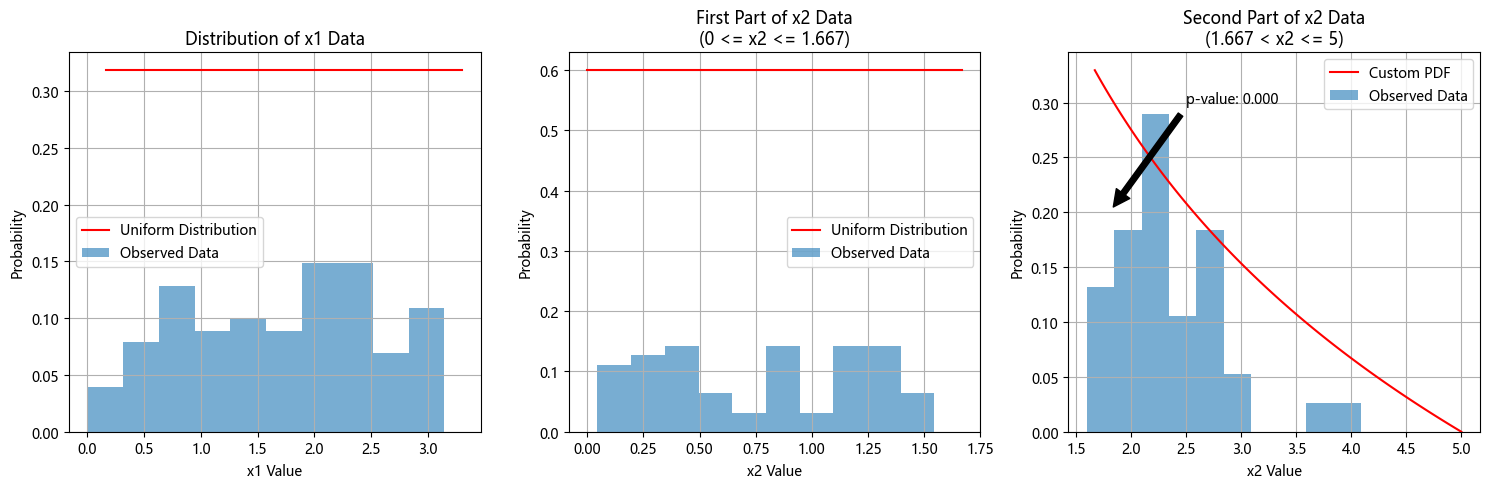

In [50]:
import numpy as np  
import pandas as pd  
from scipy import stats  
import matplotlib.pyplot as plt  

# Read local CSV file  
data = pd.read_csv('data1.csv', header=None)  

# Extract first and second column data  
x1 = data.iloc[:, 0].values  
x2 = data.iloc[:, 1].values  

# Fit uniform distribution for the first column x1  
x1_min, x1_max = np.min(x1), np.max(x1)  
uniform_fit_x1 = stats.uniform(loc=x1_min, scale=(x1_max - x1_min))  

# Split the second column x2  
x2_part1 = x2[x2 <= 1.667]  
x2_part2 = x2[(x2 > 1.667) & (x2 <= 5)]  

# Kolmogorov-Smirnov test for x1  
ks_stat_x1, ks_pvalue_x1 = stats.kstest(x1, uniform_fit_x1.cdf)  

# Kolmogorov-Smirnov test for the first part of x2  
ks_stat_x2_part1, ks_pvalue_x2_part1 = stats.kstest(x2_part1, 'uniform', args=(0, 1.667))  

# Custom probability density function for the second part of x2  
def custom_pdf(x):  
    n, m = 3, 5  
    return (n * (n - 1)) / (4 * m) * np.log((2 * m) / ((n - 1) * x))  # Corrected to use `x`  

# Kolmogorov-Smirnov test for the second part of x2  
ks_stat_x2_part2, ks_pvalue_x2_part2 = stats.kstest(x2_part2, custom_pdf)  

# Print results  
print("Kolmogorov-Smirnov Test for First Column (x1):")  
print(f"Statistic: {ks_stat_x1}, p-value: {ks_pvalue_x1}")  

print("\nKolmogorov-Smirnov Test for First Part of Second Column (x2):")  
print(f"Statistic: {ks_stat_x2_part1}, p-value: {ks_pvalue_x2_part1}")  

print("\nKolmogorov-Smirnov Test for Second Part of x2 Data:")  
print(f"Statistic: {ks_stat_x2_part2}, p-value: {ks_pvalue_x2_part2}")  

# Plot distribution graphs  
plt.figure(figsize=(15, 5))  

# x1 Distribution  
plt.subplot(1, 3, 1)  
# Histogram with probability  
counts_x1, bins_x1 = np.histogram(x1, bins=10)  
prob_x1 = counts_x1 / np.sum(counts_x1)  # Normalize to get probabilities  
plt.bar(bins_x1[:-1], prob_x1, width=np.diff(bins_x1), alpha=0.6, label='Observed Data')  

# Theoretical distribution  
x_range = np.linspace(x1_min, x1_max, 100)  
plt.plot(x_range, uniform_fit_x1.pdf(x_range), 'r-', label='Uniform Distribution')  

plt.title('Distribution of x1 Data')  
plt.xlabel('x1 Value')  
plt.ylabel('Probability')  # Y-axis represents probability  
plt.legend()  
plt.grid()  

# x2 First Part Distribution  
plt.subplot(1, 3, 2)  
# Histogram for first part with probabilities  
counts_x2_part1, bins_x2_part1 = np.histogram(x2_part1, bins=10)  
prob_x2_part1 = counts_x2_part1 / np.sum(counts_x2_part1)  # Normalize to get probabilities  
plt.bar(bins_x2_part1[:-1], prob_x2_part1, width=np.diff(bins_x2_part1), alpha=0.6, label='Observed Data')  

# Theoretical uniform distribution for first part  
x_range_part1 = np.linspace(0, 1.667, 100)  
plt.plot(x_range_part1, stats.uniform.pdf(x_range_part1, 0, 1.667), 'r-', label='Uniform Distribution')  

plt.title('First Part of x2 Data\n(0 <= x2 <= 1.667)')  
plt.xlabel('x2 Value')  
plt.ylabel('Probability')  # Y-axis represents probability  
plt.legend()  
plt.grid()  

# x2 Second Part Distribution  
plt.subplot(1, 3, 3)  
# Histogram for second part with probabilities  
counts_x2_part2, bins_x2_part2 = np.histogram(x2_part2, bins=10)  
prob_x2_part2 = counts_x2_part2 / np.sum(counts_x2_part2)  # Normalize to get probabilities  
plt.bar(bins_x2_part2[:-1], prob_x2_part2, width=np.diff(bins_x2_part2), alpha=0.6, label='Observed Data')  

# Theoretical custom distribution for second part  
x_range_part2 = np.linspace(1.667, 5, 100)  
plt.plot(x_range_part2, custom_pdf(x_range_part2), 'r-', label='Custom PDF')  # Use custom PDF directly  

# Annotate p-value on the plot  
plt.annotate(f'p-value: {ks_pvalue_x2_part2:.3f}', xy=(1.8, 0.2), xytext=(2.5, 0.3),  
             arrowprops=dict(facecolor='black', shrink=0.05),  
             fontsize=10, color='black')  

plt.title('Second Part of x2 Data\n(1.667 < x2 <= 5)')  
plt.xlabel('x2 Value')  
plt.ylabel('Probability')  # Y-axis represents probability  
plt.legend()  
plt.grid()  

plt.tight_layout()  
plt.show()

Kolmogorov-Smirnov Test for First Column (x1):
Statistic: 0.08775304282020568, p-value: 0.3953868870794258

Kolmogorov-Smirnov Test for First Part of Second Column (x2):
Statistic: 0.07867950219479924, p-value: 0.8012241484045589

Kolmogorov-Smirnov Test for Second Part of x2 Data:
Statistic: 0.9484074205780569, p-value: 2.395218678840695e-49


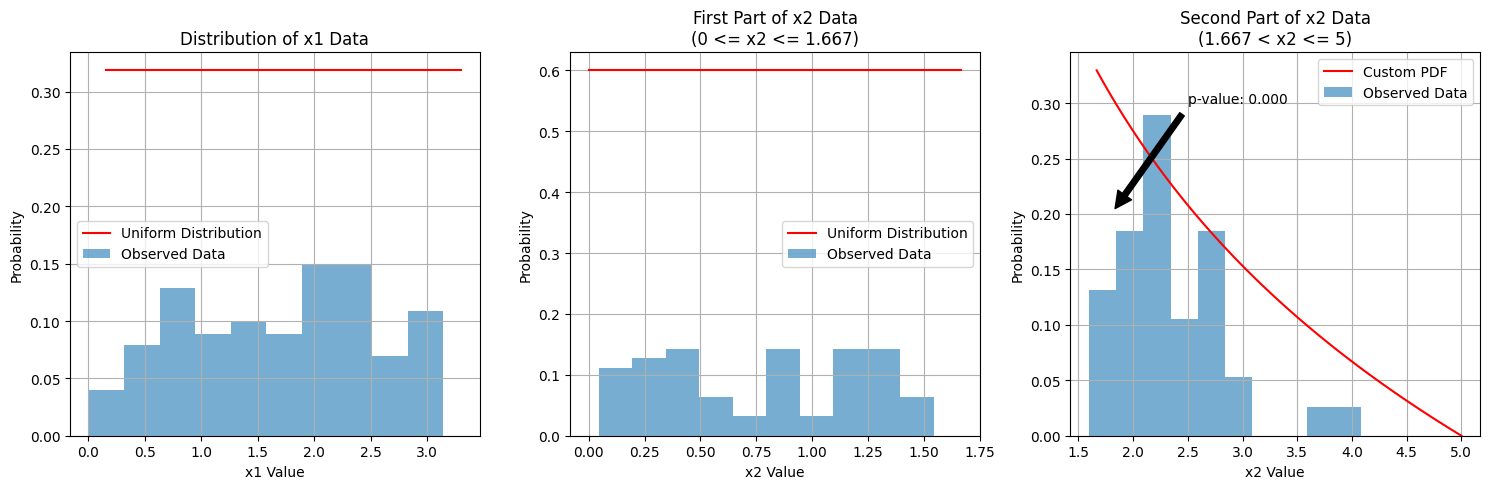

In [2]:
import numpy as np  
import pandas as pd  
from scipy import stats  
import matplotlib.pyplot as plt  

# Read local CSV file  
data = pd.read_csv('data1.csv', header=None)  

# Extract first and second column data  
x1 = data.iloc[:, 0].values  
x2 = data.iloc[:, 1].values  

# Fit uniform distribution for the first column x1  
x1_min, x1_max = np.min(x1), np.max(x1)  
uniform_fit_x1 = stats.uniform(loc=x1_min, scale=(x1_max - x1_min))  

# Split the second column x2  
x2_part1 = x2[x2 <= 1.667]  
x2_part2 = x2[(x2 > 1.667) & (x2 <= 5)]  

# Kolmogorov-Smirnov test for x1  
ks_stat_x1, ks_pvalue_x1 = stats.kstest(x1, uniform_fit_x1.cdf)  

# Kolmogorov-Smirnov test for the first part of x2  
ks_stat_x2_part1, ks_pvalue_x2_part1 = stats.kstest(x2_part1, 'uniform', args=(0, 1.667))  

# Custom probability density function for the second part of x2  
def custom_pdf(x):  
    n, m = 3, 5  
    return (n * (n - 1)) / (4 * m) * np.log((2 * m) / ((n - 1) * x))  # Corrected to use `x`  

# Kolmogorov-Smirnov test for the second part of x2  
ks_stat_x2_part2, ks_pvalue_x2_part2 = stats.kstest(x2_part2, custom_pdf)  

# Print results  
print("Kolmogorov-Smirnov Test for First Column (x1):")  
print(f"Statistic: {ks_stat_x1}, p-value: {ks_pvalue_x1}")  

print("\nKolmogorov-Smirnov Test for First Part of Second Column (x2):")  
print(f"Statistic: {ks_stat_x2_part1}, p-value: {ks_pvalue_x2_part1}")  

print("\nKolmogorov-Smirnov Test for Second Part of x2 Data:")  
print(f"Statistic: {ks_stat_x2_part2}, p-value: {ks_pvalue_x2_part2}")  

# Plot distribution graphs  
plt.figure(figsize=(15, 5))  

# x1 Distribution  
plt.subplot(1, 3, 1)  
# Histogram with probability  
counts_x1, bins_x1 = np.histogram(x1, bins=10)  
prob_x1 = counts_x1 / np.sum(counts_x1)  # Normalize to get probabilities  
plt.bar(bins_x1[:-1], prob_x1, width=np.diff(bins_x1), alpha=0.6, label='Observed Data')  

# Theoretical distribution  
x_range = np.linspace(x1_min, x1_max, 100)  
plt.plot(x_range, uniform_fit_x1.pdf(x_range), 'r-', label='Uniform Distribution')  

plt.title('Distribution of x1 Data')  
plt.xlabel('x1 Value')  
plt.ylabel('Probability')  # Y-axis represents probability  
plt.legend()  
plt.grid()  

# x2 First Part Distribution  
plt.subplot(1, 3, 2)  
# Histogram for first part with probabilities  
counts_x2_part1, bins_x2_part1 = np.histogram(x2_part1, bins=10)  
prob_x2_part1 = counts_x2_part1 / np.sum(counts_x2_part1)  # Normalize to get probabilities  
plt.bar(bins_x2_part1[:-1], prob_x2_part1, width=np.diff(bins_x2_part1), alpha=0.6, label='Observed Data')  

# Theoretical uniform distribution for first part  
x_range_part1 = np.linspace(0, 1.667, 100)  
plt.plot(x_range_part1, stats.uniform.pdf(x_range_part1, 0, 1.667), 'r-', label='Uniform Distribution')  

plt.title('First Part of x2 Data\n(0 <= x2 <= 1.667)')  
plt.xlabel('x2 Value')  
plt.ylabel('Probability')  # Y-axis represents probability  
plt.legend()  
plt.grid()  

# x2 Second Part Distribution  
plt.subplot(1, 3, 3)  
# Histogram for second part with probabilities  
counts_x2_part2, bins_x2_part2 = np.histogram(x2_part2, bins=10)  
prob_x2_part2 = counts_x2_part2 / np.sum(counts_x2_part2)  # Normalize to get probabilities  
plt.bar(bins_x2_part2[:-1], prob_x2_part2, width=np.diff(bins_x2_part2), alpha=0.6, label='Observed Data')  

# Theoretical custom distribution for second part  
x_range_part2 = np.linspace(1.667, 5, 100)  
plt.plot(x_range_part2, custom_pdf(x_range_part2), 'r-', label='Custom PDF')  # Use custom PDF directly  

# Annotate p-value on the plot  
plt.annotate(f'p-value: {ks_pvalue_x2_part2:.3f}', xy=(1.8, 0.2), xytext=(2.5, 0.3),  
             arrowprops=dict(facecolor='black', shrink=0.05),  
             fontsize=10, color='black')  

plt.title('Second Part of x2 Data\n(1.667 < x2 <= 5)')  
plt.xlabel('x2 Value')  
plt.ylabel('Probability')  # Y-axis represents probability  
plt.legend()  
plt.grid()  

plt.tight_layout()  
plt.show()